# La sous-séquence de plus grande somme

Plan

* [Enoncé](#enonce)
* [Solution naïve](#solution1)
* [Solution plus rapide](#sol2)
* [Solution dichotomique](#sol3)
* [Solution linéaire](#lin)
* [Comparaison des temps de calcul](#comparaison)
* [Application](#app)

Ce problème est connu sur le nom de [Maximum subarray problem](http://en.wikipedia.org/wiki/Maximum_subarray_problem).

<h3 id="enonce">Enoncé</h3>

On suppose qu'on a une liste $L=( l_1, l_2, ..., l_n)$. On souhaite trouver la sous-séquence de plus grande somme. En d'autres termes, on veut trouver $(i^*,j^*)$ tels que :

$$ \sum_{k=i^*}^{j^*} l_k = \max_{i,j} \sum_{k=i}^{j} l_k  $$

<h3 id="solution1">Solution naïve</h3>

La première solution consiste à calculer les sommes de toutes les sous-séquences et de garder les $i,j$ qui ont permis d'obtenir la meilleure sous-séquence. On divise le programme en deux fonctions :

* ``somme_partielle`` : calcule la somme de la sous-séquence ``l[i:j]`` (coût de la fonction : $O(n)$)
* ``plus_grande_sous_liste`` : passe en revue toutes les sous-séquences et retourne la meilleure (coût de la fonction $O(n^2)$)

Le coût de cet algorithme est en $O(n^3)$.

In [2]:
def somme_partielle (li, i, j) :
    r = 0
    for a in range (i,j) :
        r += li [a]
    return r
    # on pourrait juste écrire 
    # return sum ( li [i:j] )

def plus_grande_sous_liste (li) :
    meilleur = min(li)               # ligne A
    im,jm = -1,-1
    for i in range (0,len(li)) :
        for j in range (i+1, len(li)+1) :   # ne pas oublier +1 car sinon
                        # le dernier élément n'est jamais pris en compte
            s = somme_partielle(li, i,j)
            if s > meilleur :
                meilleur = s
                im,jm = i,j
    return li [im:jm]
    
# si li ne contient que des valeurs positives, la solution est évidemment la liste entière
# c'est pourquoi il faut tester cette fonction avec des valeurs négatives
li = [ 4,-6,7,-1,8,-50,3]
m  = plus_grande_sous_liste(li)
m

[7, -1, 8]

La ligne A contient l'instruction ``meilleur = min(li)``. Pour une liste où tous les nombres sont négatifs, la meilleure sous-liste est constitué du plus petit élément de la liste. Remplacer cette instruction par ``meilleur = 0`` a pour conséquence de retourner une liste vide dans ce cas précis. 

$$\text{coût}(n) = \sum_{i=0}^n \sum_{j=i+1}^n j-i = \sum_{i=0}^n \sum_{j=0}^i j = \sum_{i=0}^n \frac{i(i+1)}{2} \sim O(n^3) $$

<h3 id="sol2">Solution plus rapide</h3>

Il est possible de modifier cette fonction de telle sorte que le coût soit en $O(n^2)$ car on évite la répétition de certains calculs lors du calcul de la somme des sous-séquences. On peut écrire :

$$ \sum_{k=i}^{j+1} l_k = l_j + \sum_{k=i}^{j} l_k$$

Dans la seconde boucle, il suffit d'ajouter l'élément ``li[j]`` à la somme précédente.

In [5]:
def plus_grande_sous_liste_n2 (li) :
    meilleur = 0
    im,jm = -1,-1
    for i in range (0,len(li)) :
        s = 0
        for j in range (i, len(li)) :
            s += li[j]
            if s > meilleur :
                meilleur = s
                im,jm = i,j+1
    return li [im:jm]
    
li = [ 4,-6,7,-1,8,-50,3]
m  = plus_grande_sous_liste_n2(li)
print(m)

li = [1,2,3,4,5,-98,78,9,7,7]
m  = plus_grande_sous_liste_n2(li)
m   

[7, -1, 8]


[78, 9, 7, 7]

<h3 id="sol3">Solution dichotomique</h3>

Il existe une dernière version plus rapide encore. Si on considère la liste $L=(l_1, ..., l_n)$ dont on cherche à extraire la sous-séquence de somme maximale. Supposons que $l_a$ appartienne à cette sous-séquence. On construit la fonction suivante :

$$f(a,k) =\left \{ \begin{array}{ll} \sum_{i=a}^{k} l_i &\text{ si } k > a \\ \sum_{i=k}^{a} l_i &\text{ si } k < a  \end{array} \right . $$

On cherche alors les valeurs $k_1$ et $k_2$ telles que :

$$\begin{array}{rcl} f(a,k_1) &=& \max_{k<a} f(a,k) \\ f(a,k_2) &=& \max_{k>a} f(a,k) \end{array} $$

La sous-séquence de somme maximale cherchée est $[k_1,k_2]$ avec $a$ dans cet intervalle et le coût de cette recherche est en $O(n)$. Mais ceci n'est vrai que si on sait que  $l_a$ appartient à la sous-séquence de somme maximale.

Autre considération : pour deux listes $l_1$ et $l_2$, la séquence maximale de la réunion des deux appartient soit à l'une, soit à l'autre, soit elle inclut le point de jonction.

Ces deux idées mises bout à bout donne l'algorithme suivant construit de façon récursive. On coupe la liste en deux parties de longueur égale :

* On calcule la meilleure séquence sur la première sous-séquence.
* On calcule la meilleure séquence sur la seconde sous-séquence.
* On calcule la meilleure séquence en suppose que l'élément du milieu appartient à cette séquence.

La meilleure séquence est nécessairement l'une des trois.

In [41]:
def plus_grande_sous_liste_nlnn2_r (li, i,j) :
    if i == j : return 0
    elif i+1 == j : return li[i],i,i+1
    
    milieu = (i+j)//2
    
    # on coupe le problème deux
    ma,ia,ja = plus_grande_sous_liste_nlnn2_r (li, i, milieu)
    mb,ib,jb = plus_grande_sous_liste_nlnn2_r (li, milieu, j)
    
    # pour aller encore plus vite dans un cas précis
    if ja == ib :
        total = ma+mb
        im,jm = ia,jb
    else :
        # on étudie la jonction
        im,jm = milieu,milieu+1
        meilleur = li[milieu]
        s = meilleur
        for k in range (milieu+1, j) :
            s += li[k]
            if s > meilleur :
                meilleur = s
                jm = k+1
                
        total = meilleur
        meilleur = li[milieu]
        s = meilleur
        for k in range (milieu-1, i-1, -1) :
            s += li[k]
            if s > meilleur :
                meilleur = s
                im = k
        
        total += meilleur - li[milieu]
            
    if   ma >= max(mb,total) : return ma,ia,ja
    elif mb >= max(ma,total) : return mb,ib,jb
    else : return total,im,jm
        
def plus_grande_sous_liste_nlnn2 (li) :
    m,i,j = plus_grande_sous_liste_nlnn2_r (li,0,len(li))
    return li[i:j]
        
li = [ 4,-6,7,-1,8,-50,3]
m  = plus_grande_sous_liste_nlnn2(li)
print(m)   # affiche [7, -1, 8]

li = [1,2,3,4,5,-98,78,9,7,7]
m  = plus_grande_sous_liste_nlnn2(li)
m   # affiche [79, 9, 7, 7]    

[7, -1, 8]


[78, 9, 7, 7]

Le coût de cette fonction est au pire en $O(n \ln n)$. A chaque itération, on effectue trois calculs :

* meilleure séquence à droite : $f(n/2)$
* meilleure séquence à gauche : $f(n/2)$
* meilleure séquence incluant $a$ : $n$

Le coût de l'iteration $n$ est $f(n)=n + 2f(n/2)$ avec $f(1)=0$. On calcule les premières termes : 

In [18]:
cout = lambda n : 0 if n == 1 else n+2*cout(n//2)
for i in range(1,10):
    print("f({0})={1} --> f({0})/{0} = {2}".format(2**i,cout(2**i),cout(2**i)/2**i))

f(2)=2 --> f(2)/2 = 1.0
f(4)=8 --> f(4)/4 = 2.0
f(8)=24 --> f(8)/8 = 3.0
f(16)=64 --> f(16)/16 = 4.0
f(32)=160 --> f(32)/32 = 5.0
f(64)=384 --> f(64)/64 = 6.0
f(128)=896 --> f(128)/128 = 7.0
f(256)=2048 --> f(256)/256 = 8.0
f(512)=4608 --> f(512)/512 = 9.0


On suppose que $f(2^n)=n2^n \Leftrightarrow f(n) = n \ln_2 n$. Il suffit de vérifier cela avec la récurrence : 

$$\begin{array}{rcl} f(n) &=& n + 2f(\frac{n}{2}) = n + 2 \frac{n}{2} \ln_2(\frac{n}{2}) \\ &=& n + n \ln_2(n) - n\ln_2(2) = n + n\ln_2(n) - n = n\ln_2 n\end{array}$$

C'est le coût d'une itération. Comme à chaque itération on coupe le problème en deux, le coût total de l'algorithme est :

$$ \begin{array}{rcl} C(2^n) &=& f(2^n) + 2f(2^{n-1}) + 4f(2^{n-2}) + ... + 2^{n-1}f(2) = \sum_{k=1}^{n} 2^{n-k} f(2^k) \\ &=& \sum_{k=1}^n 2^{n-k} 2^k k = \sum_{k=1}^n 2^n k = 2^{n-1}n(n-1) \leqslant 2^{n-1} n^2 \end{array} $$

Par conséquent, le coût est en $C(n) \sim O(n \ln^2 n)$.

<h3 id="lin">Solution linéaire</h3>

La dernière solution est la plus rapide. Elle consiste à parcourir la liste dans le sens croissant des indices et à construire la série cumulée.

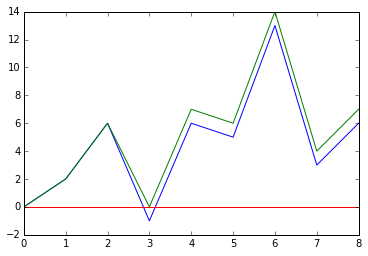

In [38]:
import matplotlib.pyplot as plt
li = [ 0, 2, 4,-7,7,-1,8,-10,3]
cumul = [ li [0] ]
for i in li[1:] : cumul.append( cumul[-1] + i )
cumul2 = [ li [0] ]
for i in li[1:] : cumul2.append( max(cumul2[-1] + i,0) )
plt.plot(cumul)
plt.plot(cumul2)
plt.plot ( [0 for c in cumul ])

La courbe devient négative au quatrième nombre. L'astuce consiste à dire qu'on peut traiter les deux ensembles séparément et que la meilleure sous-séquence n'inclura pas cet nombre en quatrième position. Si on cherche la meilleure sous-séquence se terminant à la position $i$, il suffit juste de revenir en arrière et de trouver le minimum de la courbe cumulée avant la position $i$. Pour $i=5$, le point le plus bas qui précède est le point $k=3$. Au point $i=3$, on sait qu'il n'existe pas de sous-séquence positive précédent $i=3$.

On découpe la courbe en segments $[[i,j]]$ vérifiant $l_{i-1} < 0 \leqslant l_i$ et $\sum_{k=1}^{j} l_k < 0$ et $l_{j+1} \geqslant 0$.

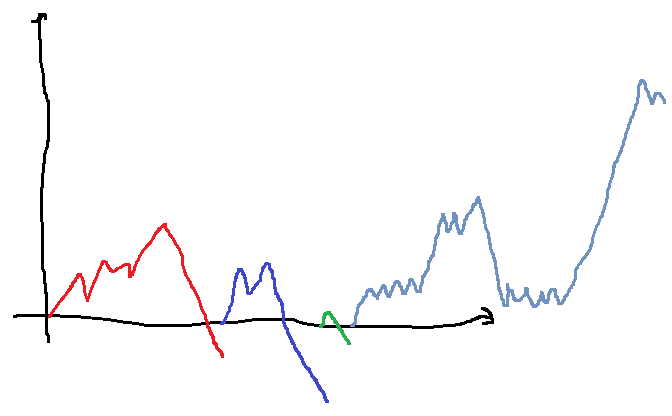

In [39]:
from IPython.core.display import Image
Image("sommemax.png")

On parcourt la série cumulée. A chaque fois qu'on passe sous zéro, au premier nombre positif suivant, on redémarre à zéro. La sous-séquence de somme maximale est forcément dans un de ces tronçons, elle a pour point de départ le premier élément et pour point d'arrivée le maximum obtenu sur le tronçon en question : pour chaque point $x,Cumul(x)$ d'un tronçon, le minimum de la courbe cumulée précédent $x$ est nécessairement le premier élément du tronçon.

In [24]:
def plus_grande_sous_liste_n (li) :
    meilleur = [ None for i in li ]
    somme    = [ None for i in li ]
    best     = None
        
    for i,el in enumerate(li):
        if i == 0 or meilleur[i-1] is None:
            meilleur[i] = i
            somme[i] = el
            if best is None or somme[i] > somme[best]:
                best = i
        else:
            if el >= 0 or somme[i-1] > -el :
                meilleur[i] = meilleur[i-1] 
                somme[i] = somme[i-1] + el
                if best is None or somme[i] > somme[best]:
                    best = i
                
    i,j = meilleur[best], best+1
    return li [i:j]
    
li = [ 4,-6,7,-1,8,-10,3]
m  = plus_grande_sous_liste_n(li)
print(m)   # affiche [7, -1, 8]

li = [1,2,3,4,5,-98,78,9,7,7]
m  = plus_grande_sous_liste_n(li)
m

[7, -1, 8]


[78, 9, 7, 7]

<h3 id="comparaison">Comparaison des temps de calcul</h3>

On effectue cela sur une liste de nombres aléatoire négatifs et positifs.

In [43]:
import random
li100 = [ random.randint(-10,50) for i in range(0,100) ]

Coût en $O(n^3)$ :

In [44]:
%timeit plus_grande_sous_liste(li100)

10 loops, best of 3: 22.5 ms per loop


Coût en $O(n^2)$ :

In [45]:
%timeit plus_grande_sous_liste_n2(li100)

1000 loops, best of 3: 920 µs per loop


Coût en $O(n \ln^2 n)$ :

In [46]:
%timeit plus_grande_sous_liste_nlnn2(li100)

1000 loops, best of 3: 265 µs per loop


Coût en $O(n)$ :

In [47]:
%timeit plus_grande_sous_liste_n(li100)

10000 loops, best of 3: 89.9 µs per loop


<h3 id="app">Application</h3>

Le [drawdown](http://en.wikipedia.org/wiki/Drawdown_%28economics%29) est un indicateur de performance pour les systèmes de trading. Il mesure la perte maximale enregistrée sur une période. En d'autres, il correspond à la sous-séquence de somme minimale. On vient de montrer qu'il n'est pas plus long à calculer qu'une moyenne.